In [1]:
#Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 
#Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
#И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 
#Ниже вы найдете пошаговую инструкцию по выполнению проекта.

In [2]:
#Описание датасета

#Посмотрим на переменные, которые содержит датасет:

#1 school — аббревиатура школы, в которой учится ученик
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
#3 age — возраст ученика (от 15 до 22)
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
#17 famsup — семейная образовательная поддержка (yes или no)
#18 paid — дополнительные платные занятия по математике (yes или no)
#19 activities — дополнительные внеучебные занятия (yes или no)
#20 nursery — посещал детский сад (yes или no)
#21 higher — хочет получить высшее образование (yes или no)
#22 internet — наличие интернета дома (yes или no)
#23 romantic — в романтических отношениях (yes или no)
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 absences — количество пропущенных занятий
#29 score — баллы по госэкзамену по математике

In [3]:
# Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
#Посмотрите на распределение признака для числовых переменных, устраните выбросы.
#Оцените количество уникальных значений для номинативных переменных.
#По необходимости преобразуйте данные
#Проведите корреляционный анализ количественных переменных
#Отберите не коррелирующие переменные.
#Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
#Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [4]:
#1. Первичная обработка данных
#Ипортируем библиотеки и посмотрим что хранится в файле

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
#Приведем стобцы к единому написанию и удалим отсутсвующий в опсании столбец.
stud.rename(columns={'Pstatus':'pstatus', 'Medu':'medu', 'Fedu':'fedu', 'Mjob':'mjob', 'Fjob':'fjob'}, inplace = True)
stud.drop(['studytime, granular'], inplace = True, axis=1)
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [7]:
#После предобрабокт видим что датасет состоит из:
#13 категориальных переменных: medu, fedu, mjob, fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health.
#13 бинарных переменных: school, sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.
#3 количественных переменных: age, absences, score


In [8]:
#Обработка и анализ данных

In [9]:
#категориальные данные

In [10]:
#medu

In [11]:
display(pd.DataFrame(stud.medu.value_counts()))
stud.loc[:, ['medu']].info()

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [12]:
#Можем сделать вывод что большинство матерей имеют высшее и среднее образование.
#Так же видим что пропущенны всего 3 значения из 395
#Заменим пропуск на самое популярное значение

In [13]:
stud['medu'].fillna(stud.medu.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.medu.value_counts()))
stud.loc[:, ['medu']].info()

,medu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [14]:
#fedu

In [15]:
display(pd.DataFrame(stud.fedu.value_counts()))
stud.loc[:, ['fedu']].info()

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [16]:
#Большинство отцов имеют среднее образование. Пропусков данных - 24. ЗХаменим их на самое популярное занчение

In [17]:
stud['fedu'].fillna(stud.fedu.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.fedu.value_counts()))
stud.loc[:, ['fedu']].info()

,fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [18]:
#mjob

In [19]:
display(pd.DataFrame(stud.mjob.value_counts()))
stud.loc[:, ['mjob']].info()

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [20]:
#Занятость большинства матерей - other. Пропусков данных - 19

In [21]:
stud['mjob'].fillna(stud.mjob.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.mjob.value_counts()))
stud.loc[:, ['mjob']].info()

,mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [22]:
#fjob

In [23]:
display(pd.DataFrame(stud.fjob.value_counts()))
stud.loc[:, ['fjob']].info()

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
#Занятость большинства отцов - other. Пропусков данных - 36

In [25]:
stud['fjob'].fillna(stud.fjob.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.fjob.value_counts()))
stud.loc[:, ['fjob']].info()

,fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [26]:
#reason

In [27]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [28]:
#Основная причина выбора школы - образовательная программа. Но в целом сожно заметить что достаточно близко
#к основной причине находятся - Близость школы, Репутация Школы
#Пропусков - 17

In [29]:
stud['reason'].fillna(stud.reason.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [30]:
#guardian

In [31]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [32]:
#В значительном большинстве случаев опекун - мать.
#Пропусков -31

In [33]:
stud['guardian'].fillna(stud.guardian.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [34]:
#traveltime

In [35]:
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [36]:
#В значительном количестве случаев путь до школы составляет менее 15 минут.
#Пропусков - 28

In [37]:
stud['traveltime'].fillna(stud.traveltime.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [38]:
#studytime

In [39]:
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [40]:
#Время на учёбу помимо школы в неделю от 2 до 5 часов в неделю.
#Пропусков - 7

In [41]:
stud['studytime'].fillna(stud.studytime.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [42]:
#failures (не совсем понятно что значит это поле, но обработаем его так же как остальные)

In [43]:
display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [44]:
#В абсолютном большистве случаев колличество внеучебных неудач - 0
#Пропусков - 22

In [45]:
stud['failures'].fillna(stud.failures.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [46]:
#famrel

In [47]:
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()
#Видим явно ошибочно введенное значение.
#Удалим строку
stud = stud.loc[stud.famrel != -1.0]
stud.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [48]:
#В большинстве случаев семейные отношения оцениваются на 4, что можно считать хорошими
#Пропусков - 27

In [49]:
stud['famrel'].fillna(stud.famrel.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [50]:
#freetime

In [51]:
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,62
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  383 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [52]:
#В большинстве случаев колличество свободного времени оценивается как - 3
#Пропусков - 11

In [53]:
stud['freetime'].fillna(stud.freetime.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

,freetime
3.0,164
4.0,112
2.0,62
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [54]:
#goout

In [55]:
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

,goout
3.0,127
2.0,100
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   386 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [56]:
#В большинстве случаев колличество времени проведенного с друзьями оценивается как - 3
#Пропусков - 8

In [57]:
stud['goout'].fillna(stud.goout.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

,goout
3.0,135
2.0,100
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [58]:
#health

In [59]:
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,health
5.0,137
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  379 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [60]:
#В большинстве случаев текущее состояние здоровья оценивается как - 5(очень хорошо)
#Пропусков - 15

In [61]:
stud['health'].fillna(stud.health.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,health
5.0,152
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [62]:
#Бинарные переменные

In [63]:
#school

In [64]:
display(pd.DataFrame(stud.school.value_counts()))
print("Уникальных значений:", stud.school.nunique())
stud.loc[:, ['school']].info()

,school
GP,348
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [65]:
#Большинство учеников учатся в школе GP, пропуски данных отствутсвуют. 

In [66]:
#sex

In [67]:
display(pd.DataFrame(stud.sex.value_counts()))
print("Уникальных значений:", stud.sex.nunique())
stud.loc[:, ['sex']].info()

,sex
F,207
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [68]:
#Учеников женского и мужского пола примерно одинаково, пропуски данных отсуствуют

In [69]:
#address

In [70]:
display(pd.DataFrame(stud.address.value_counts()))
print("Уникальных значений:", stud.address.nunique())
stud.loc[:, ['address']].info()

,address
U,294
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [71]:
#Значительное большиство учеников живет в городе. Пропусков данных - 17
#Заменим пропуски на самое поплярное значение

In [72]:
stud['address'].fillna(stud.address.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

,address
U,311
R,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [73]:
#famsize

In [74]:
display(pd.DataFrame(stud.famsize.value_counts()))
print("Уникальных значений:", stud.famsize.nunique())
stud.loc[:, ['famsize']].info()

,famsize
GT3,260
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [75]:
#У большиства учеников количество членов семьи больше 3.
#Проопусков данных - 27

In [76]:
stud['famsize'].fillna(stud.famsize.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

,famsize
GT3,287
LE3,107


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [77]:
#pstatus

In [78]:
display(pd.DataFrame(stud.pstatus.value_counts()))
print("Уникальных значений:", stud.pstatus.nunique())
stud.loc[:, ['pstatus']].info()

,pstatus
T,314
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [79]:
#У большиства учеников родители живут вместе. Пропусков - 44

In [80]:
stud['pstatus'].fillna(stud.pstatus.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.pstatus.value_counts()))
stud.loc[:, ['pstatus']].info()

,pstatus
T,358
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [81]:
#schoolsup

In [82]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
print("Уникальных значений:", stud.schoolsup.nunique())
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,334
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [83]:
#Большинство учеников не получают дополнительной образовательной поддержки
#Пропусков - 9

In [84]:
stud['schoolsup'].fillna(stud.schoolsup.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()

,schoolsup
no,343
yes,51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [85]:
#famsup

In [86]:
display(pd.DataFrame(stud.famsup.value_counts()))
print("Уникальных значений:", stud.famsup.nunique())
stud.loc[:, ['famsup']].info()

,famsup
yes,218
no,137


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [87]:
#Большинство учеников получают семейнаю образовательную поддержку
#Пропусков - 39

In [88]:
stud['famsup'].fillna(stud.famsup.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,famsup
yes,257
no,137


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [89]:
#paid

In [90]:
display(pd.DataFrame(stud.paid.value_counts()))
print("Уникальных значений:", stud.paid.nunique())
stud.loc[:, ['paid']].info()

,paid
no,200
yes,154


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [91]:
#Почти половина учеников посещуют дополнитльные платные занятия по математике
#Пропусков - 40

In [92]:
stud['paid'].fillna(stud.paid.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

,paid
no,240
yes,154


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [93]:
#activities

In [94]:
display(pd.DataFrame(stud.activities.value_counts()))
print("Уникальных значений:", stud.activities.nunique())
stud.loc[:, ['activities']].info()

,activities
yes,195
no,185


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [95]:
#Приблизетельно одинаковое количестиво учеников посещают внеучебные занятия
#Пропусков - 14

In [96]:
stud['activities'].fillna(stud.activities.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

,activities
yes,209
no,185


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [97]:
#nursery

In [98]:
display(pd.DataFrame(stud.nursery.value_counts()))
print("Уникальных значений:", stud.nursery.nunique())
stud.loc[:, ['nursery']].info()

,nursery
yes,300
no,78


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [99]:
#Большинство учеников посещали детский сад
#Пропусков - 16

In [100]:
stud['nursery'].fillna(stud.nursery.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()

,nursery
yes,316
no,78


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [101]:
#higher

In [102]:
display(pd.DataFrame(stud.higher.value_counts()))
print("Уникальных значений:", stud.higher.nunique())
stud.loc[:, ['higher']].info()

,higher
yes,355
no,19


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [103]:
#Абсолютное большинство учеников планирует получать высшее образование
#Пропусков - 20

In [104]:
stud['higher'].fillna(stud.higher.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

,higher
yes,375
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [105]:
#internet

In [106]:
display(pd.DataFrame(stud.internet.value_counts()))
print("Уникальных значений:", stud.internet.nunique())
stud.loc[:, ['internet']].info()

,internet
yes,304
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [107]:
#Абсолютное большиснтво учеников имеют доступ к интернету
#Пропусков - 34

In [108]:
stud['internet'].fillna(stud.internet.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

,internet
yes,338
no,56


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [109]:
#romantic

In [110]:
display(pd.DataFrame(stud.romantic.value_counts()))
print("Уникальных значений:", stud.romantic.nunique())
stud.loc[:, ['romantic']].info()

,romantic
no,239
yes,124


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [111]:
#Большая часть учеников не находится в романтических отношениях
#Пропусков - 31

In [112]:
stud['romantic'].fillna(stud.romantic.value_counts().index[0], inplace=True)
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()

,romantic
no,270
yes,124


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [113]:
#Количественые переменые

In [114]:
#age

In [115]:
stud.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     394 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


In [116]:
#Пропуски данных отсуствуют

In [117]:
stud.age.describe()

count    394.000000
mean      16.697970
std        1.277181
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [118]:
#Максимальные и минимальные значения в лежат в пределах между 15 и 22, что соответсвет условиям задачи
#Для наглядности распределения визуализируем данные гистограммой

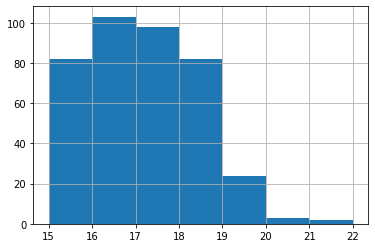

In [119]:
stud.age.hist(bins = 7)

In [120]:
#absences

In [121]:
stud.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  382 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [122]:
#Видим что в данных присутсвуют пропуски. Заменим их на медианное значение

In [123]:
stud['absences'].fillna(stud.absences.median())


0        6.0
1        4.0
2       10.0
3        2.0
4        4.0
       ...  
390    212.0
391      3.0
392      3.0
393      0.0
394      5.0
Name: absences, Length: 394, dtype: float64

In [124]:
#Визуализируем распределение признака

count    382.000000
mean       7.261780
std       23.493441
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

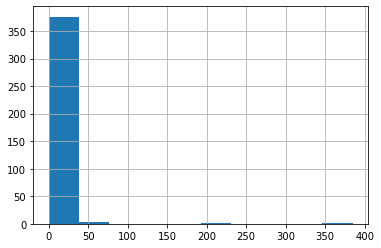

In [125]:
stud.absences.hist()
stud.absences.describe()

In [126]:
#Видим на диаграмме выбросы. Чтобы отфильтровать их  воспользоваться формулой интерквартильного расстояния

In [127]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


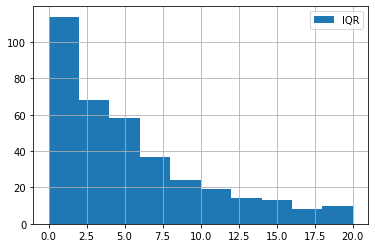

In [128]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist( label = 'IQR')
plt.legend();


In [129]:
#Видим что формула отбрасывает некоторе количество реальных начений. Поэтому вручную удалим выбросы больше 50

In [130]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [131]:
stud = stud.loc[stud.absences <= 50]

count    377.000000
mean       5.283820
std        6.329312
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

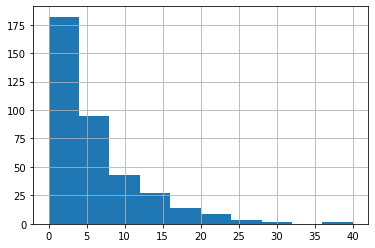

In [132]:
stud.absences.hist()
stud.absences.describe()

In [133]:
#score

In [134]:
stud.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  377 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


In [135]:
#Столбец содержит некоторе количество пропусков. Замених их на медиану

In [136]:
stud['score'].fillna(stud.score.median())

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
389     0.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 377, dtype: float64

In [137]:
#Можем посмотреть на распределение признака

count    372.000000
mean      52.043011
std       22.899482
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

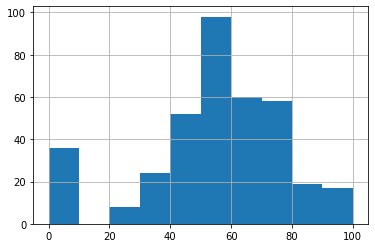

In [138]:
stud.score.hist()
stud.score.describe()

In [139]:
#Для фильтрации выбросов воспользоваться формулой интерквартильного расстояния

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


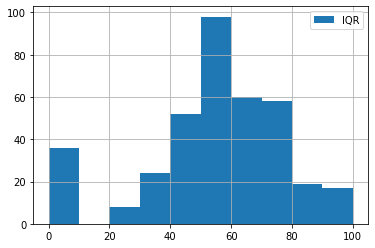

In [140]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist( label = 'IQR')
plt.legend();

In [141]:
#Отбросим всех учеников не набравших баллов на экзамене

count    336.000000
mean      57.619048
std       16.077725
min       20.000000
25%       48.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

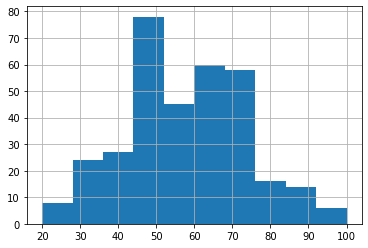

In [142]:
stud = stud.loc[stud.score > 0]
stud.score.hist()
stud.score.describe()

In [143]:
#Кореляционный анализ

In [144]:
#Проведем кареляционный анализ числовых значений

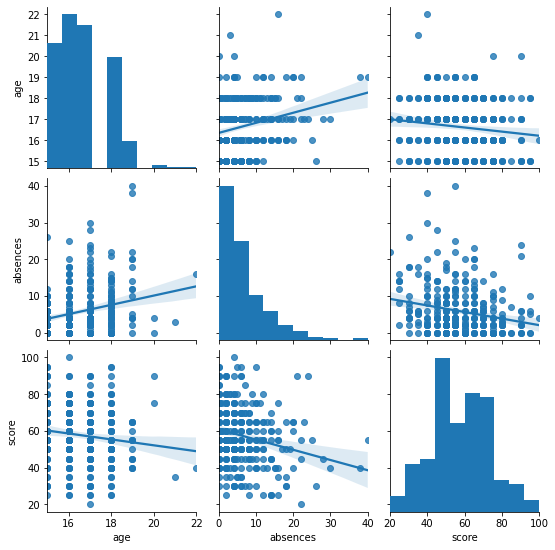

In [145]:
sns.pairplot(stud[['age', 'absences', 'score']], kind = 'reg')

In [146]:
stud[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.246070,-0.125617
absences,0.246070,1.000000,-0.223003
score,-0.125617,-0.223003,1.000000


In [147]:
#Видим что корреляция числовых признаков очень слабая

In [148]:
#Проведем анализ номинативных признаков

In [149]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

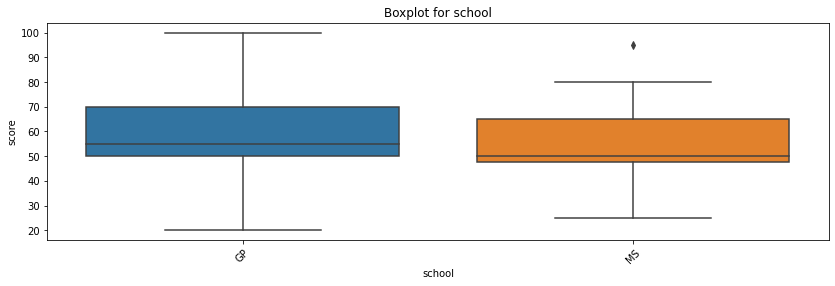

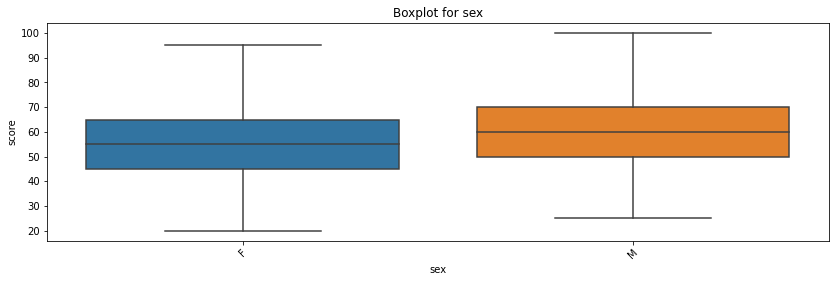

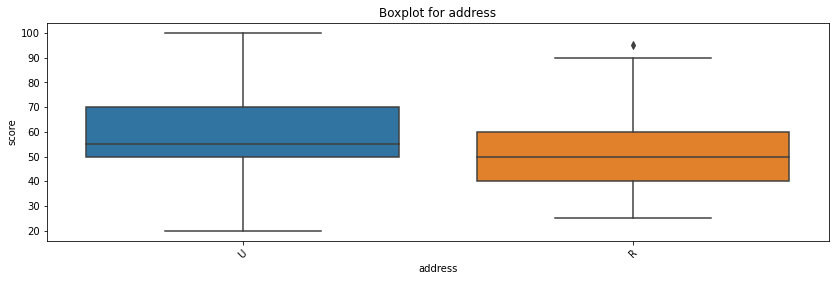

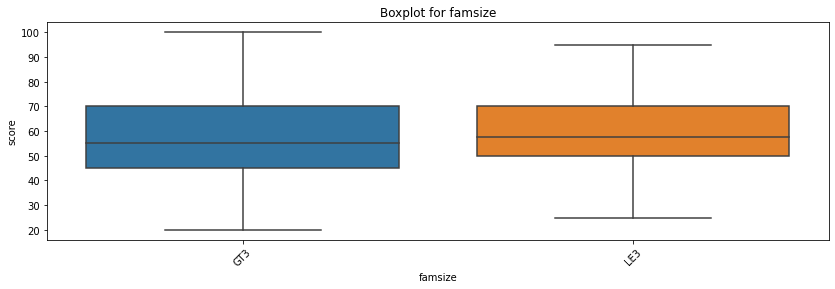

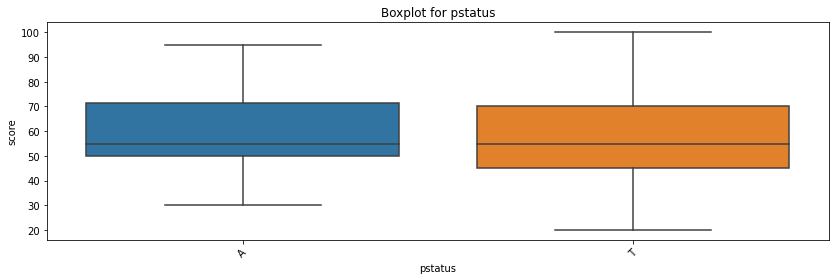

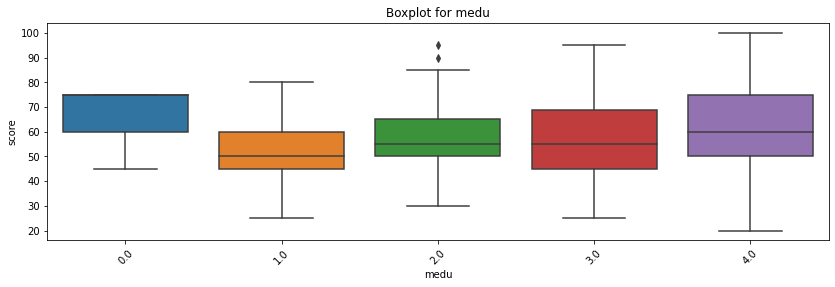

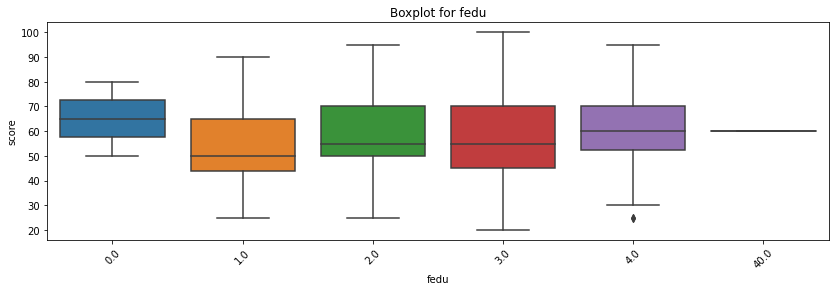

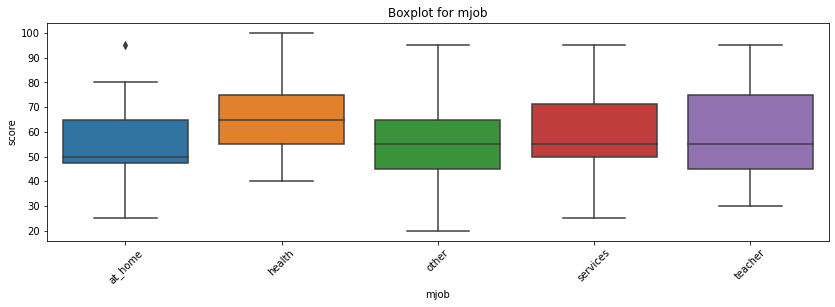

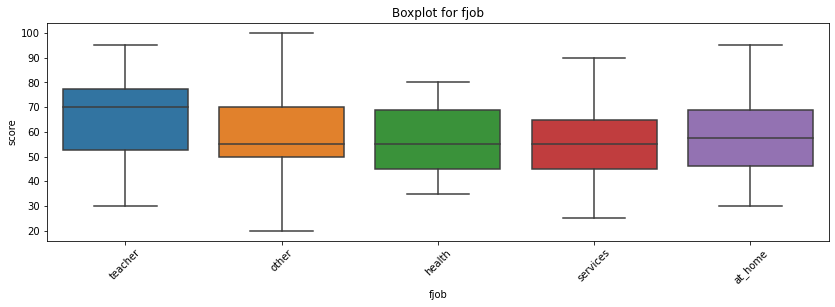

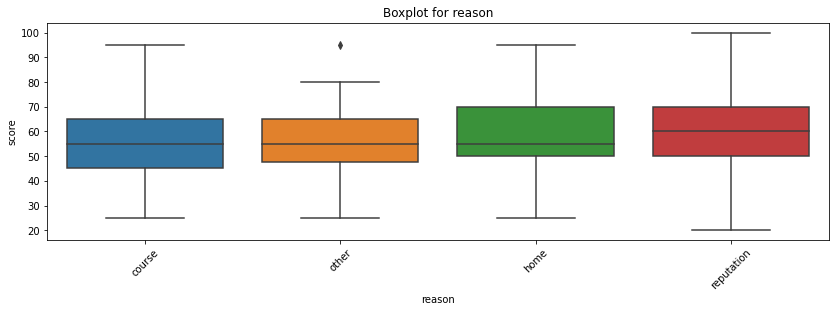

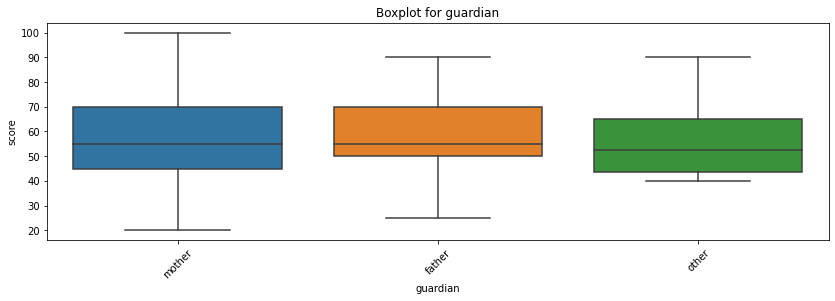

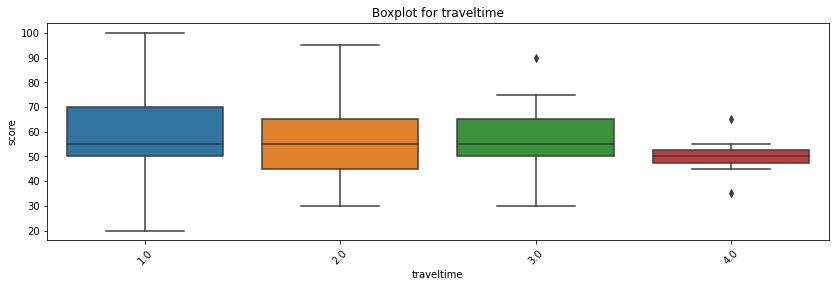

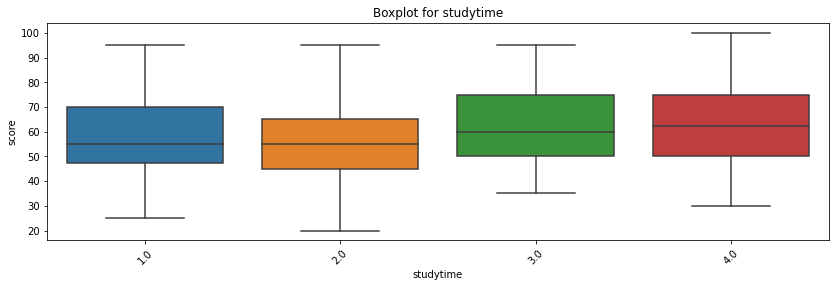

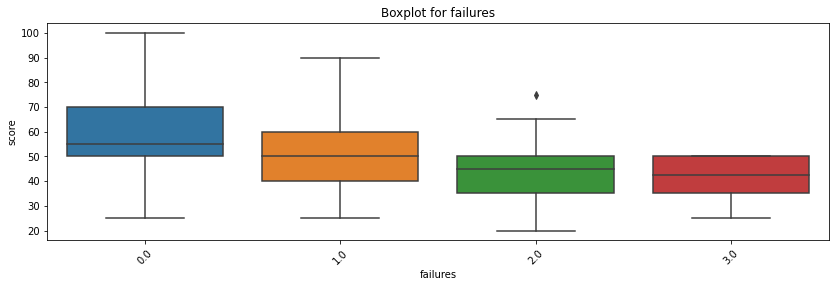

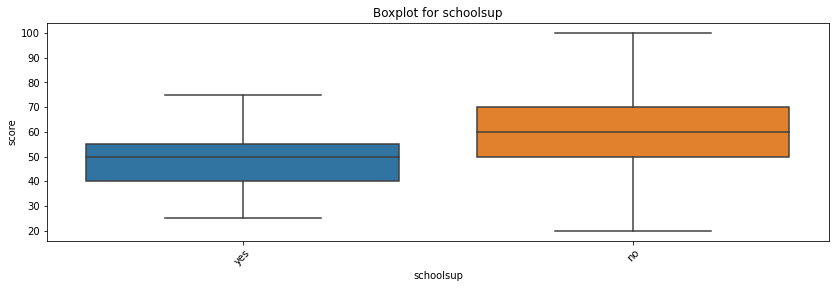

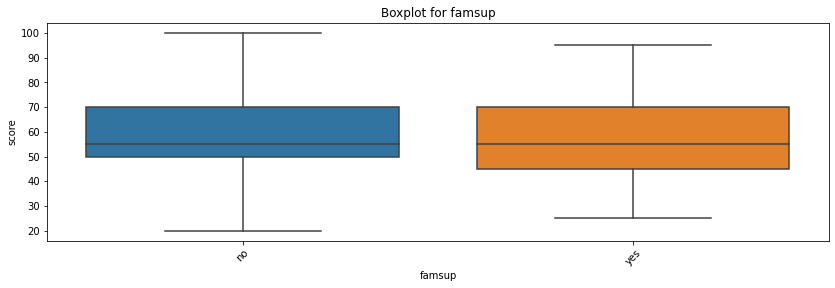

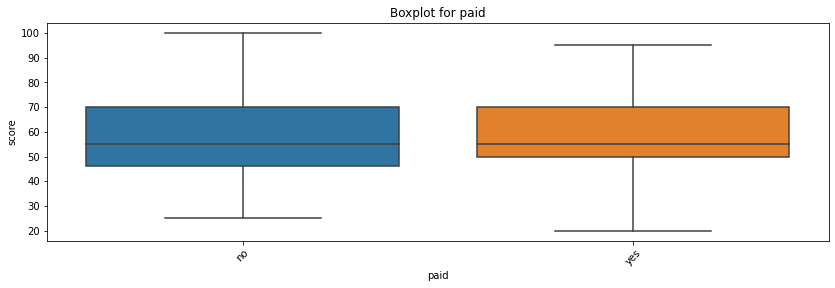

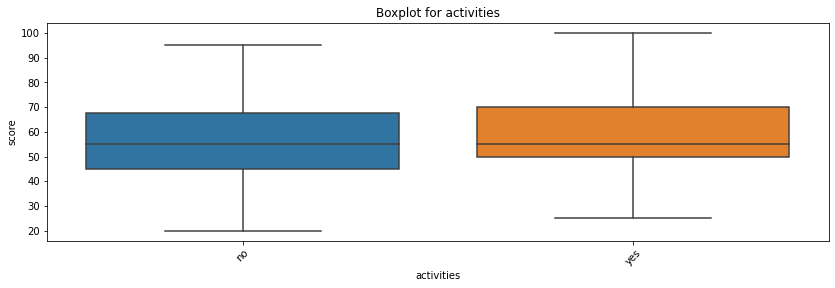

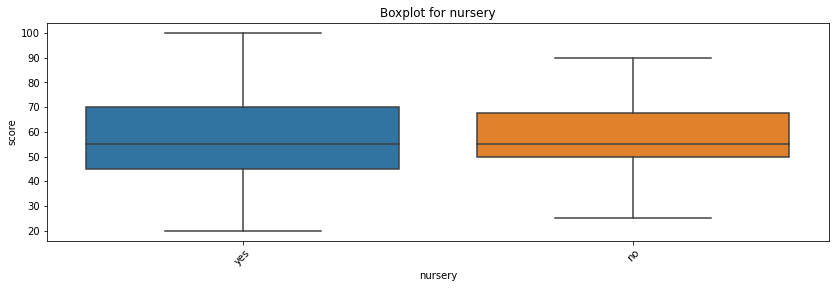

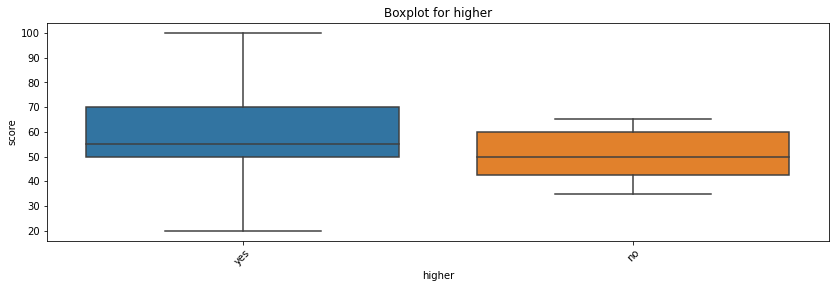

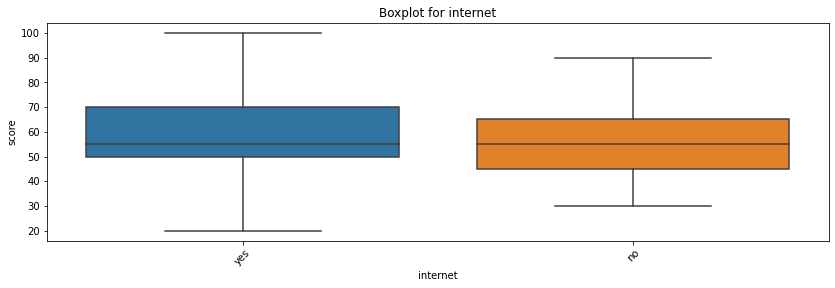

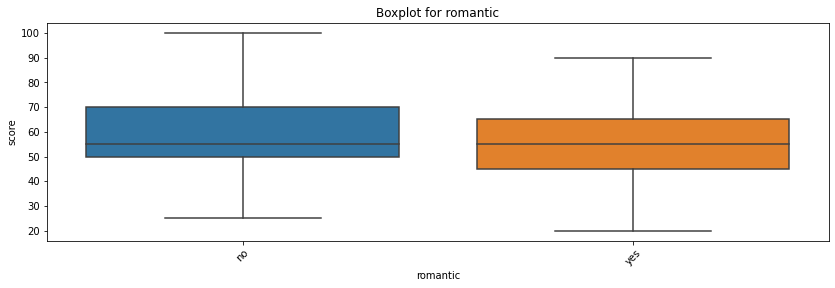

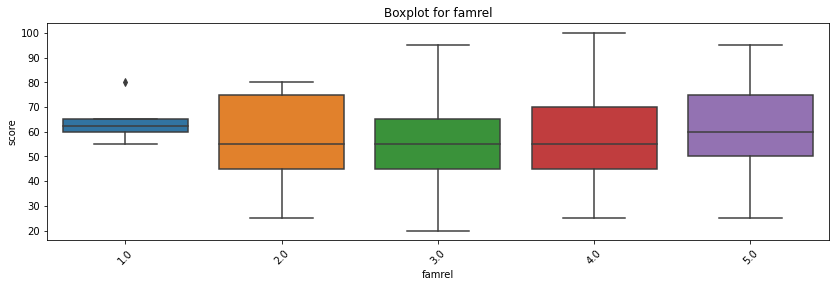

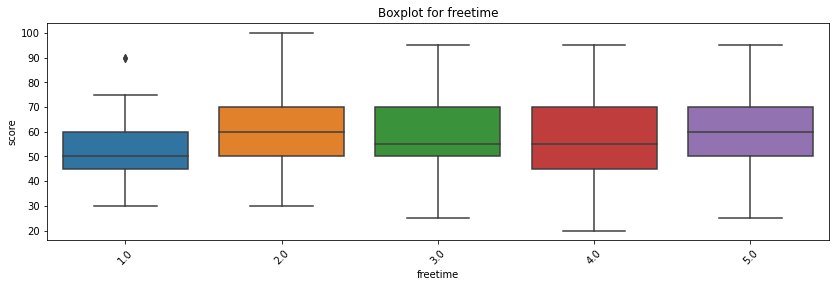

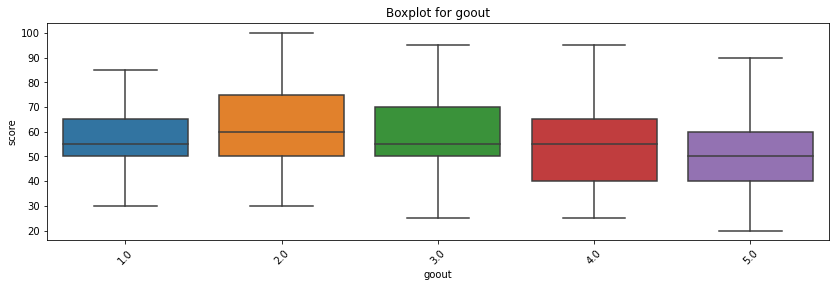

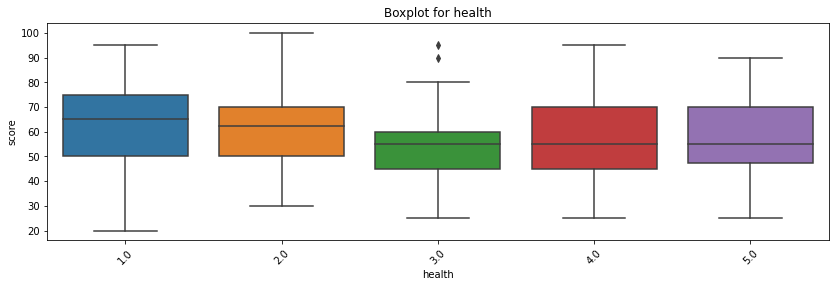

In [150]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu',
       'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health']:
    get_boxplot(col)

In [151]:
#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
#Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [152]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [153]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu',
       'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


C:\Users\home\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\home\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\home\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
Положительная корреляция по парамметру m_edu говорит о прямой зависимости уровня образования матери и оценки по математике
Положительная корреляция по парамметру f_edu говорит о прямой зависимости уровня образования отца и оценки по математике
Отрицательная корреляция параметра age и score говорит об обратной зависимости возвраста и оценки по математике
Отрицательная корреляция параметра failures и score говорит об обратной зависимости количства неудач и оценки по математике
Отрицательная корреляция параметра goout и score говорит об обратной зависимости времени проведенного с друзьями и оценки по математик



In [ ]:
Так же при выполнении проекта для сокрашения трудозатрат и количества кода необходимого для заполения 
пропущенных значений можно было напистаь функции заменяющеи все пропущенные значения на максимальные для 
категориальных и бинарных переменных 
и заменяющихз пропущенные значения на медианных для количественных переменных
